# 🎯 Fraud Detection in Ride Payments

This notebook explores patterns in failed transactions to identify potential fraud signals among first-time users and prepare data for predictive modeling.

## Project Goals

- **[Data Analyst]** Identify behavioral and contextual patterns to detect first-time fraudulent users
- **[Product Manager]** Based on findings, propose top 2 product/development actions to reduce failed payments (for small dev team)
- **[Data Analyst]** Prepare a clean, feature-rich dataset for predictive modeling (success vs. fail)

## Research Themes

Grouped into:  
- User behavior  
- Geography & device risk  
- Payment & pricing behavior  
- Time patterns  
- Model prep & product strategy


## 📥 1. Data Loading & Cleaning

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Ensure plots show in notebook
%matplotlib inline

# Load data
path = "/Users/Glebazzz/Jupiter/Taxi"
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_taxi.csv'))

# Initial inspection
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211134 entries, 0 to 211133
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             211134 non-null  int64  
 1   device_name            211134 non-null  object 
 2   device_os_version      211134 non-null  object 
 3   country                211134 non-null  object 
 4   city_id                210922 non-null  float64
 5   lat                    211134 non-null  float64
 6   lng                    211134 non-null  float64
 7   real_destination_lat   211109 non-null  float64
 8   real_destination_lng   211109 non-null  float64
 9   user_id                211134 non-null  int64  
 10  order_id               211134 non-null  int64  
 11  order_try_id           211134 non-null  int64  
 12  distance               211134 non-null  int64  
 13  ride_distance          211134 non-null  int64  
 14  price                  211134 non-nu

,Unnamed: 0,device_name,device_os_version,country,city_id,lat,lng,real_destination_lat,real_destination_lng,user_id,...,failed_attempts,payment_status,date,time,hour,price_per_km,has_price_review,missing_card_bin,missing_city_id,missing_destination
0,0,"iPhone7,2",iOS9.3.2,lv,3.0,56.940491,24.205735,56.986446,24.212078,1049762,...,1,success,2017-01-07,08:06:54,8,0.001084,False,0,0,False
1,1,samsungSM-G925F,samsung6.0.1,za,54.0,-25.934881,27.925587,-25.765843,28.147555,1049795,...,0,success,2017-01-14,10:01:06,10,0.007652,False,0,0,False
2,2,HUAWEIHUAWEI GRA-L09,HUAWEI5.0,za,54.0,-25.755839,28.200672,-25.758168,28.190223,1050357,...,0,success,2017-04-14,12:12:36,12,0.010412,False,0,0,False
3,3,samsungSM-G930F,samsung7.0,lv,3.0,56.916998,24.085802,56.962930,24.122637,1050459,...,0,success,2017-01-07,11:57:54,11,0.000756,False,0,0,False
4,4,"iPhone7,1",iOS10.2,lv,3.0,56.950372,24.111675,56.949719,24.131011,1050525,...,1,success,2017-01-07,17:55:25,17,0.001041,False,0,0,False


## 🔍 2. Exploratory Data Analysis (EDA)

### 2.1 User Behavior & Fraud Signals

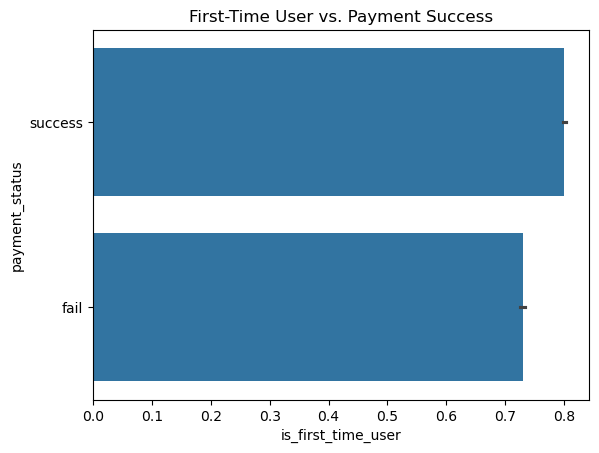

In [8]:
# Example: First-time user flag
df['is_first_time_user'] = df['failed_attempts'] == 0

# First-time users vs. payment success
sns.barplot(data=df, x='is_first_time_user', y='payment_status')
plt.title("First-Time User vs. Payment Success")
plt.show()


### 2.2 Geography & Device Risk

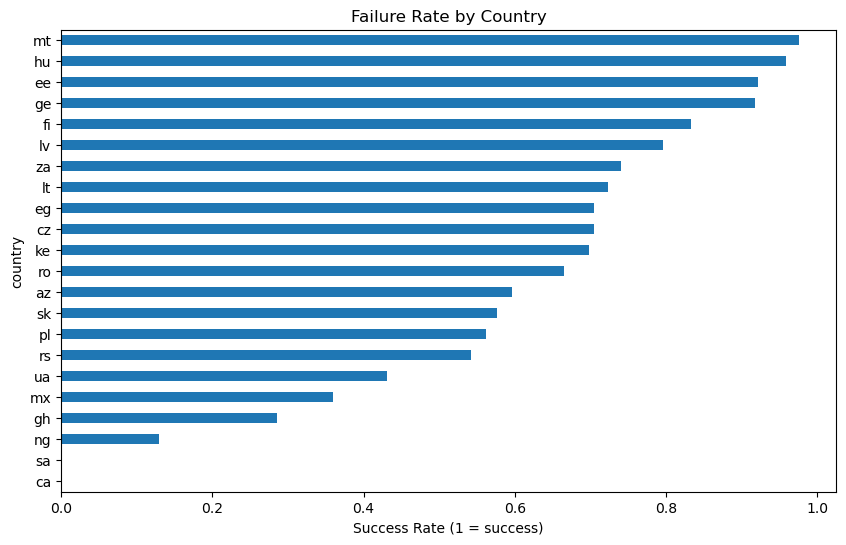

In [15]:
#Transforming  payment sttus to boolean
df['payment_status_num'] = df['payment_status'].map({'success': 1, 'fail': 0})

# Failure rate by country
country_fail = df.groupby('country')['payment_status_num'].mean().sort_values()


country_fail.plot(kind='barh', figsize=(10,6), title="Failure Rate by Country")
plt.xlabel("Success Rate (1 = success)")
plt.show()


### 2.3 Payment & Pricing Behavior

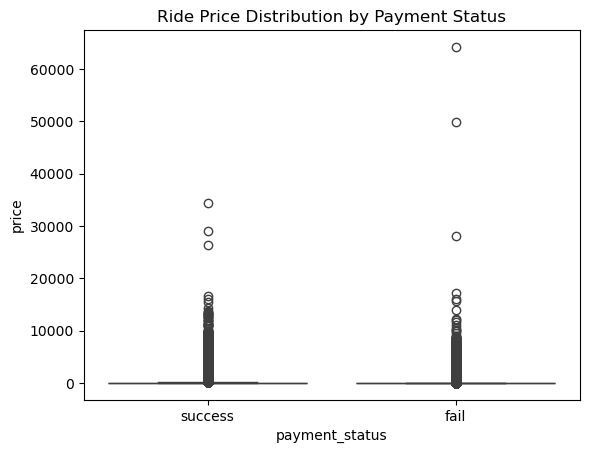

In [18]:
# Price vs. Payment Status
sns.boxplot(data=df, x='payment_status', y='price')
plt.title("Ride Price Distribution by Payment Status")
plt.show()


### 2.4 Time & Pattern Analysis

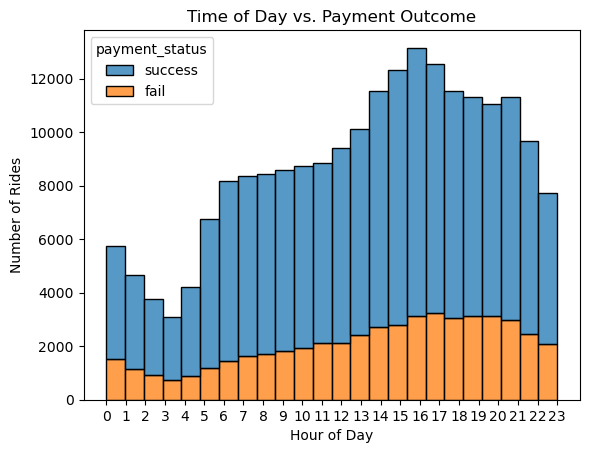

In [25]:
# Hour of ride
df['ride_hour'] = df['hour']  

sns.histplot(data=df, x='ride_hour', hue='payment_status', bins=24, multiple='stack')
plt.title("Time of Day vs. Payment Outcome")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
plt.xticks(range(0, 24))
plt.show()


## 🔄 3. Feature Engineering

In [35]:
# Encode key features
df['missing_card_bin'] = df['card_bin'].isna()
df['price_per_km'] = df['price'] / df['ride_distance'].replace(0, np.nan)



## 📊 4. Correlation & Predictive Features

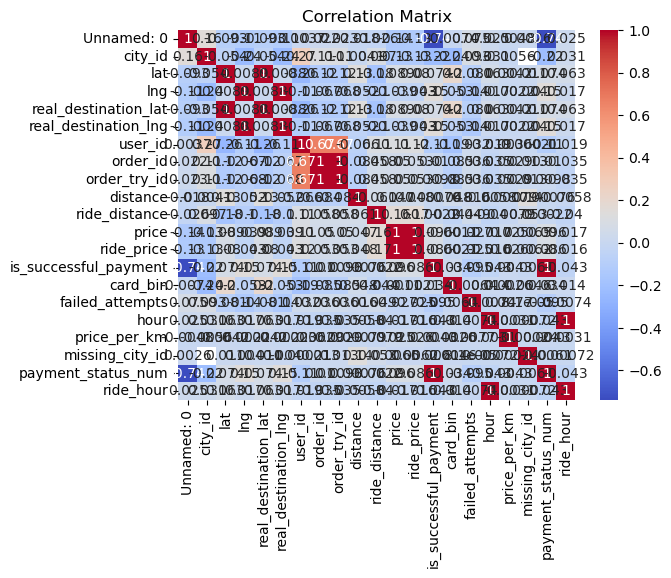

In [37]:
# Correlation matrix of numeric features
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## 🧪 5. Hypothesis & Simulation Setup

### Key Hypotheses

- **H1**: First-time users have a higher rate of failed transactions.
- **H2**: Users with multiple failed attempts are less likely to succeed in future retries.
- **H3**: Missing card_bin or city_id increases likelihood of failure.
- **H4**: Free or high-priced rides fail more often.
- **H5**: Midnight–5am transactions are riskier.

These hypotheses will be validated through statistical tests and model feature importance scores.
